# Project Wattpad
## Data Analysis
This jupyter notebook contains the analysis for the Wattpad stories based on the categories, languages and tags. It attempts to answer the following questions from the Project proposal.

### Research Questions to Answer:
* Q1-Mean story popularity by category by read count, vote count, comment count?
* Q5-What are the most popular categories? 
* Q6-What are the most popular languages? 

### Additional Analysis - stories by tags:
After looking at the analysis for categories and languages, we realize that the data is not appropriately categories, and the stories mainly belond to one category called "Random" and are all in English. This means one or more of the following: 
* the data set does not represent an appropriate sample of the entire data 
* the data is not appropriately categorized
* the data we get is mostly in English based on whatever algorithm is used by the api and the sample does not cover all languages
* there is no stories data for other languages

Since the categories does not give us much to group the data, we decided to divide the stories by tags. Each story has multiple tags so we look at story distribution and popularity by tags


In [455]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [456]:
stories_df = pd.read_csv("Data/stories_for_viz.csv")
stories_df.head()

,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,length,...,languageName,mature,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName
0,133389768,My Life Journal,"A journal about my life, it's basically in the...",https://www.wattpad.com/story/133389768-my-lif...,2017-12-29T00:19:07Z,2018-03-12T23:42:38Z,False,10,False,12832,...,English,False,1,"['deep', 'poetry', 'thoughtsandfeelings']",4,81,13,https://a.wattpad.com/useravatar/Kdovey.128.89...,Edith Igiby,Kdovey
1,140612217,Potatoes and Bananas,Hello! This book is just filled with random sh...,https://www.wattpad.com/story/140612217-potato...,2018-03-02T18:55:18Z,2018-03-12T23:42:38Z,False,1,False,1310,...,English,False,1,"['life', 'random', 'stories', 'storys']",0,0,0,https://a.wattpad.com/useravatar/FairyTailFan3...,Kat Sara :3,FairyTailFan348
2,138039449,Random INSANE stuff,Random Insane stuff,https://www.wattpad.com/story/138039449-random...,2018-02-08T13:00:50Z,2018-03-12T23:42:42Z,False,156,False,15501,...,English,False,0,"['ever', 'fub', 'most']",1694,1836,299,https://a.wattpad.com/useravatar/TheDrowningMa...,Loopy Lupin,TheDrowningMan
3,139812393,Stuff,.................................................,https://www.wattpad.com/story/139812393-stuff,2018-02-25T04:19:12Z,2018-03-12T23:42:40Z,False,6,False,2852,...,English,False,0,"['canada', 'facts', 'merica', 'myself', 'mẹ', ...",62,53,12,https://a.wattpad.com/useravatar/Cursher.128.2...,Cursher,Cursher
4,141682708,ℋℰᎯᏉᎽ▶️misc,"""i m\nh o l d i n g\no n .\nw h y \ni s\ne v e...",https://www.wattpad.com/story/141682708-%E2%84...,2018-03-12T22:18:09Z,2018-03-12T23:42:40Z,False,11,False,2539,...,English,False,0,"['admin', 'misc', 'miscellaneous', 'ooa']",4,28,14,https://a.wattpad.com/useravatar/bxhemiankxcks...,asshole #2,bxhemiankxcks


In [494]:
stories_df.count()

id              1421
title           1421
description     1421
url             1421
createDate      1421
modifyDate      1421
completed       1421
numParts        1421
deleted         1421
length          1421
categoryId      1421
categoryName    1421
languageId      1421
languageName    1421
mature          1421
rating          1421
tags            1421
commentCount    1421
readCount       1421
voteCount       1421
userAvatar      1421
userFullname    1159
userName        1421
dtype: int64

In [457]:
stories_df["categoryName"].value_counts()

Fanfiction            548
Random                330
Romance               132
Teen Fiction           76
Poetry                 57
Fantasy                44
Non-Fiction            34
Short Story            33
Humor                  29
Adventure              26
General Fiction        23
Mystery / Thriller     17
Horror                 17
Action                 15
Werewolf               13
Paranormal              8
Spiritual               6
Historical Fiction      4
Vampire                 4
Science Fiction         3
ChickLit                2
Name: categoryName, dtype: int64

In [458]:
stories_df["languageName"].value_counts()

English      1419
Português       2
Name: languageName, dtype: int64

## Distribution of stories by category

In [459]:
category_grp = stories_df.groupby("categoryName", as_index=False)
stories_by_category = category_grp.count()
stories_by_category

,categoryName,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,...,languageName,mature,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName
0,Action,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,10,15
1,Adventure,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,21,26
2,ChickLit,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2
3,Fanfiction,548,548,548,548,548,548,548,548,548,...,548,548,548,548,548,548,548,548,442,548
4,Fantasy,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,38,44
5,General Fiction,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,19,23
6,Historical Fiction,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,Horror,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,15,17
8,Humor,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,22,29
9,Mystery / Thriller,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,13,17


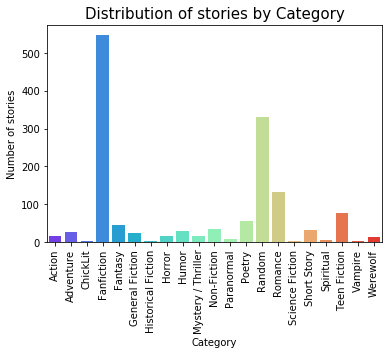

In [461]:
# create a bar plot
sns.barplot(x=stories_by_category["categoryName"], y=stories_by_category["id"], data=stories_by_category, palette='rainbow', label="Stories by Category")

# set plot properties
plt.title("Distribution of stories by Category", size=15)
plt.ylabel("Number of stories", size=10)
plt.xlabel("Category", size=10)
plt.xticks(rotation="vertical")

# plot and save
plt.savefig("Images/dist_category_bar.png")
plt.show()

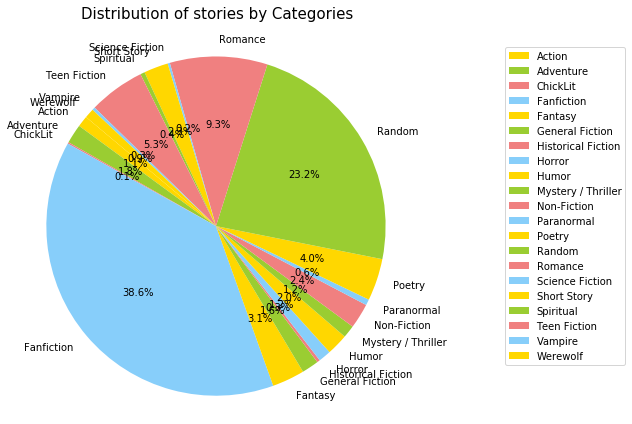

In [468]:
# create pie chart
plt.figure(1, figsize=(6,6))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
patches, texts, autotexts = plt.pie(stories_by_category["id"], 
                                    labels=stories_by_category["categoryName"], colors=colors,
                                    autopct='%1.1f%%', startangle=140)

# set plot properties
plt.legend(patches, stories_by_category["categoryName"], loc="best", bbox_to_anchor=(1.2,1))
plt.axis('equal')
plt.title("Distribution of stories by Categories\n", size=15)
plt.tight_layout()
# plot and save
plt.savefig("Images/dist_category_pie.png")
plt.show()

## Distribution of stories by language

In [469]:
language_grp = stories_df.groupby("languageName", as_index=False)
stories_by_language = language_grp.count()
stories_by_language

,languageName,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,...,languageId,mature,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName
0,English,1419,1419,1419,1419,1419,1419,1419,1419,1419,...,1419,1419,1419,1419,1419,1419,1419,1419,1157,1419
1,Português,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


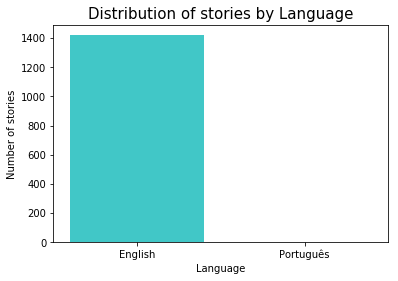

In [470]:
# create bar chart
sns.barplot(x=stories_by_language["languageName"], y=stories_by_language["id"], data=stories_by_language, palette='rainbow', label="Stories by Language")

# set plot properties
plt.title("Distribution of stories by Language", size=15)
plt.ylabel("Number of stories", size=10)
plt.xlabel("Language", size=10)

# plot and save image
plt.savefig("Images/dist_language_bar.png")
plt.show()

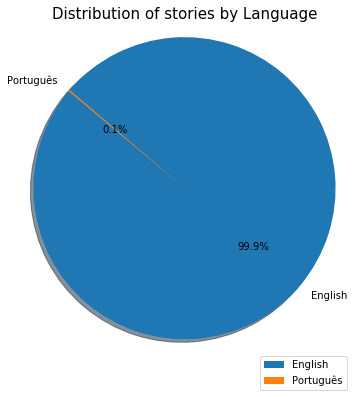

In [471]:
# create a pie chart
plt.figure(1, figsize=(6,6))
patches, texts, autotexts = plt.pie(stories_by_language["id"], 
                                    labels=stories_by_language["languageName"],
                                    autopct='%1.1f%%', shadow=True, startangle=140)

# set pie chart properties
plt.legend(patches, stories_by_language["languageName"], loc="best", bbox_to_anchor=(1,0))
plt.axis('equal')
plt.title("Distribution of stories by Language", size=15)

# plot and save image
plt.savefig("Images/dist_language_pie.png")
plt.show()

## Popularity of stories by category 

### Popularity of stories based on how many were read

In [472]:
popularity_df = category_grp.mean()
popularity_df

,categoryName,id,completed,numParts,deleted,length,categoryId,languageId,mature,rating,commentCount,readCount,voteCount
0,Action,1.326903e+08,0.000000,13.866667,0.0,58318.066667,14.0,1.000000,0.000000,0.466667,126.600000,1081.733333,183.333333
1,Adventure,1.332472e+08,0.038462,10.576923,0.0,44104.730769,11.0,1.000000,0.000000,0.384615,152.884615,6150.384615,398.384615
2,ChickLit,1.305282e+08,0.000000,16.500000,0.0,166314.000000,24.0,1.000000,0.000000,0.500000,41.500000,1720.500000,170.000000
3,Fanfiction,1.323783e+08,0.032847,15.671533,0.0,67600.930657,6.0,1.000000,0.009124,0.496350,222.098540,5319.153285,312.178832
4,Fantasy,1.322973e+08,0.000000,4.750000,0.0,30725.568182,3.0,1.113636,0.022727,0.522727,21.863636,81.909091,6.727273
5,General Fiction,1.345827e+08,0.000000,10.217391,0.0,25408.434783,21.0,1.000000,0.000000,0.565217,73.478261,427.173913,50.913043
6,Historical Fiction,1.313063e+08,0.000000,15.250000,0.0,198871.000000,23.0,1.000000,0.000000,0.750000,20.500000,1107.500000,64.750000
7,Horror,1.346223e+08,0.000000,7.294118,0.0,8905.294118,9.0,1.000000,0.000000,0.411765,78.764706,286.764706,55.705882
8,Humor,1.370659e+08,0.000000,12.137931,0.0,11276.482759,7.0,1.000000,0.000000,0.517241,73.275862,197.344828,40.034483
9,Mystery / Thriller,1.395816e+08,0.058824,7.882353,0.0,35672.647059,8.0,1.000000,0.000000,0.470588,6.823529,44.941176,8.705882


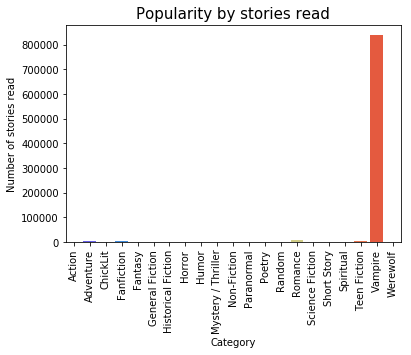

In [474]:
ax = sns.barplot(x=popularity_df["categoryName"], y=popularity_df["readCount"], data=popularity_df, palette='rainbow', label="Popularity by Stories read")
plt.title("Popularity by stories read", size=15)
plt.ylabel("Number of stories read", size=10)
plt.xlabel("Category", size=10)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity_category_by_readCount.png")
plt.show()

### Popularity of stories based on Comments

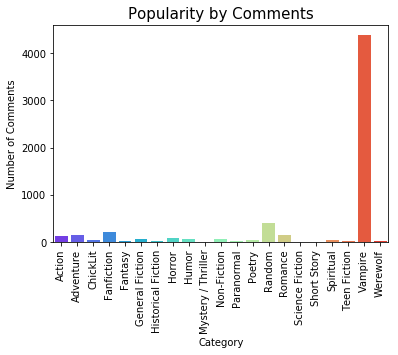

In [476]:
sns.barplot(x=popularity_df["categoryName"], y=popularity_df["commentCount"], data=popularity_df, palette='rainbow', label="Popularity by Comments")
plt.title("Popularity by Comments", size=15)
plt.ylabel("Number of Comments", size=10)
plt.xlabel("Category", size=10)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity__category_by_comments.png")
plt.show()

### Popularity of stories based on Votes

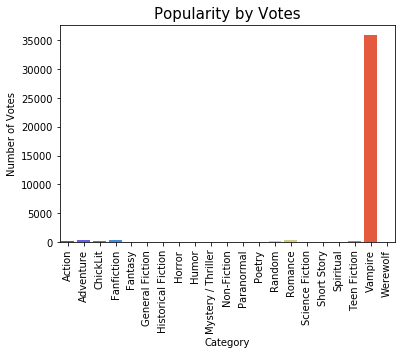

In [477]:
sns.barplot(x=popularity_df["categoryName"], y=popularity_df["voteCount"], data=popularity_df, palette='rainbow', label="Popularity by Votes")
plt.title("Popularity by Votes", size=15)
plt.ylabel("Number of Votes", size=10)
plt.xlabel("Category", size=10)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity_category_by_votes.png")
plt.show()

## Distribution of stories by tags

In [478]:
stories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 23 columns):
id              1421 non-null int64
title           1421 non-null object
description     1421 non-null object
url             1421 non-null object
createDate      1421 non-null object
modifyDate      1421 non-null object
completed       1421 non-null bool
numParts        1421 non-null int64
deleted         1421 non-null bool
length          1421 non-null int64
categoryId      1421 non-null int64
categoryName    1421 non-null object
languageId      1421 non-null int64
languageName    1421 non-null object
mature          1421 non-null bool
rating          1421 non-null int64
tags            1421 non-null object
commentCount    1421 non-null int64
readCount       1421 non-null int64
voteCount       1421 non-null int64
userAvatar      1421 non-null object
userFullname    1159 non-null object
userName        1421 non-null object
dtypes: bool(3), int64(9), object(11)
memory usage: 226.3

In [487]:
# Function to get the tags as a list from the tags columns
def get_tag_list(tag_str):
    tag_str = tag_str.strip("['")
    tag_str = tag_str.strip("']")
    tag_str = tag_str.strip("', '")
    tags = tag_str.split("', '")
    return tags

# get all the tags from the stories and get the top 10 popular tags
all_tags = []
for index,row in stories_df.iterrows():
    tag = row["tags"]
    all_tags += get_tag_list(tag)

tags_df = pd.DataFrame({"tag": all_tags})
tags_counts = pd.DataFrame(tags_df["tag"].value_counts())
popular_tags = tags_counts.iloc[0:10, :]

popular_tags.reset_index(inplace=True)
popular_tags = popular_tags.rename(columns={"tag":"count","index":"tag"})
popular_tags

,tag,count
0,romance,200
1,love,183
2,random,111
3,fanfiction,108
4,bts,93
5,drama,51
6,jungkook,50
7,jimin,49
8,life,47
9,fanfic,46


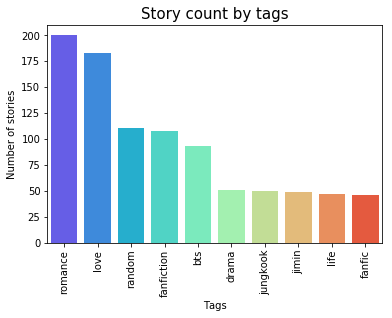

In [488]:
sns.barplot(x="tag", y="count", data=popular_tags, palette='rainbow')
plt.title("Story count by tags", size=15)
plt.ylabel("Number of stories", size=10)
plt.xlabel("Tags", size=10)
plt.xticks(rotation="vertical")
plt.savefig("Images/tag_distribution_bar.png")
plt.show()

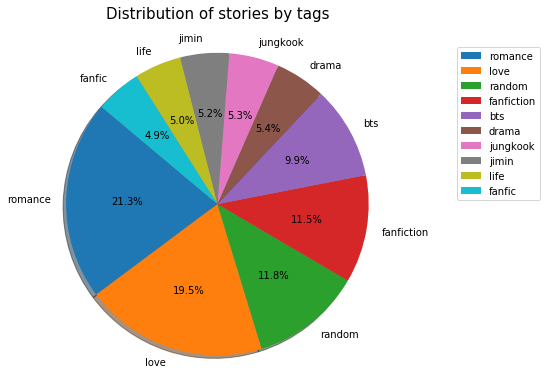

In [489]:
# create a pie chart
plt.figure(1, figsize=(6,6))
patches, texts, autotexts = plt.pie(popular_tags["count"], 
                                    labels=popular_tags["tag"],
                                    autopct='%1.1f%%', shadow=True, startangle=140)

# set pie chart properties
plt.legend(patches, popular_tags["tag"], loc="best", bbox_to_anchor=(1.2,1))
plt.axis('equal')
plt.title("Distribution of stories by tags\n", size=15)

# plot and save image
plt.savefig("Images/tag_distribution_pie.png")
plt.show()

## Popularity of stories by tags

In [490]:
# Getting the vote count, comment count and read count by tags
tags_dict = {}
read_dict = {}
comment_dict = {}
vote_dict = {}

# Loop through the stories and add the counts for each tag of the story
for index,row in stories_df.iterrows():
    story_tags = row["tags"]
    read_count = row["readCount"]
    comment_count = row["commentCount"]
    vote_count = row["voteCount"]
    
    # For each story, loop through the tags and see which one matches the tags list.
    for tag_index, tag_row in popular_tags.iterrows():
        tag_name = tag_row["tag"]
        if tag_name in get_tag_list(story_tags):
            if tag_name in tags_dict.keys():
                tags_dict[tag_name] += 1
                read_dict[tag_name] += read_count
                comment_dict[tag_name] += comment_count
                vote_dict[tag_name] += vote_count
            else:
                tags_dict[tag_name] = 1
                read_dict[tag_name] = read_count
                comment_dict[tag_name] = comment_count
                vote_dict[tag_name] = vote_count
    
# create data frame for all types of counts
# vote counts
vote_df = pd.DataFrame({"tag": list(vote_dict.keys()),
                       "votes": list(vote_dict.values()) })

# comment counts
comment_df = pd.DataFrame({"tag": list(comment_dict.keys()),
                       "comments": list(comment_dict.values())})

# comment counts
reads_df = pd.DataFrame({"tag": list(read_dict.keys()),
                       "reads": list(read_dict.values())})



### Popularity of stories by tags, using the vote count

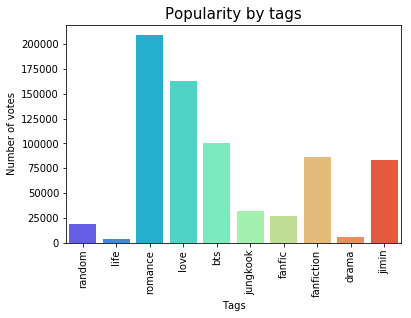

In [491]:
sns.barplot(x="tag", y="votes", data=vote_df, palette='rainbow')
plt.title("Popularity by tags", size=15)
plt.ylabel("Number of votes", size=10)
plt.xlabel("Tags", size=10)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity_tags_by_votes.png")
plt.show()

### Popularity of stories by tags, using the comment count

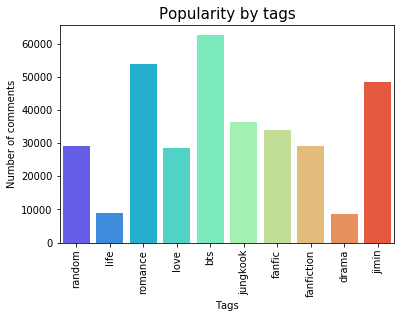

In [492]:
sns.barplot(x="tag", y="comments", data=comment_df, palette='rainbow')
plt.title("Popularity by tags", size=15)
plt.ylabel("Number of comments", size=10)
plt.xlabel("Tags", size=10)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity_tags_by_comments.png")
plt.show()

### Popularity of stories by tags, using the read count

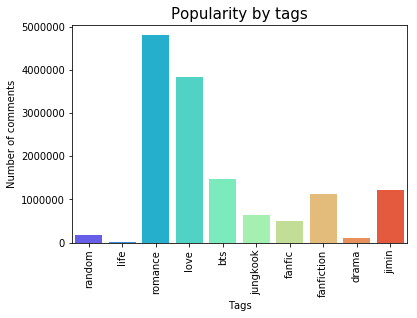

In [493]:
sns.barplot(x="tag", y="reads", data=reads_df, palette='rainbow')
plt.title("Popularity by tags", size=15)
plt.ylabel("Number of comments", size=10)
plt.xlabel("Tags", size=10)
plt.xticks(rotation="vertical")
plt.savefig("Images/popularity_tags_by_reads.png")
plt.show()

In [ ]:
plt.subplots()
